## Forest monitoring notebooks
#### Author: Miguel Chapela Rivas
##### This notebook does a simple forest classfication based on NDVI

### Libraries imports

In [1]:
import shapely
import shapely.wkt
from auxiliary_functions import calculate_ndvi
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


### Area of interest polygon

In [2]:
aoi_str = "POLYGON((11.33774986963 46.43661880584709,11.866466910645626 46.43661880584709,11.866466910645626 46.195699723242456,11.33774986963 46.195699723242456,11.33774986963 46.43661880584709))"
aoi = shapely.wkt.loads(aoi_str)

### Compute NDVI for day 1 - 21/10/2018

In [3]:
B04_img1 = 'input\S2B_MSIL2A_20181021T101039_N0209_R022_T32TPS_20181021T151822\S2B_MSIL2A_20181021T101039_N0209_R022_T32TPS_20181021T151822.SAFE\GRANULE\L2A_T32TPS_A008485_20181021T101201\IMG_DATA\R10m\T32TPS_20181021T101039_B04_10m.jp2'
B08_img1 = 'input\S2B_MSIL2A_20181021T101039_N0209_R022_T32TPS_20181021T151822\S2B_MSIL2A_20181021T101039_N0209_R022_T32TPS_20181021T151822.SAFE\GRANULE\L2A_T32TPS_A008485_20181021T101201\IMG_DATA\R10m\T32TPS_20181021T101039_B08_10m.jp2'

ndvi_1,ndvi_1_path = calculate_ndvi(B04_img1, B08_img1,aoi)


c:\Users\micr\Documents\Nueva Carpeta\CGI - EARTH OBSERVATION APPLICATIONS ENGINEER-SPACE\Technical Challenge\technical_challenge_CGI\preliminary_technical_solution\auxiliary_functions.py:77: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (B08_data_reflectance - B04_data_reflectance) / (B08_data_reflectance + B04_data_reflectance)


### Compute NDVI for day 2 - 15/12/2018

In [4]:
B04_img2 = 'input\S2A_MSIL2A_20181215T101421_N9999_R022_T32TPS_20221022T175856\GRANULE\L2A_T32TPS_A018180_20181215T101420\IMG_DATA\R10m\T32TPS_20181215T101421_B04_10m.jp2'
B08_img2 = 'input\S2A_MSIL2A_20181215T101421_N9999_R022_T32TPS_20221022T175856\GRANULE\L2A_T32TPS_A018180_20181215T101420\IMG_DATA\R10m\T32TPS_20181215T101421_B08_10m.jp2'

ndvi_2,ndvi_2_path = calculate_ndvi( B04_img2, B08_img2,aoi)

### Plot NDVI for both days

<ipython-input-5-aff816034592>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


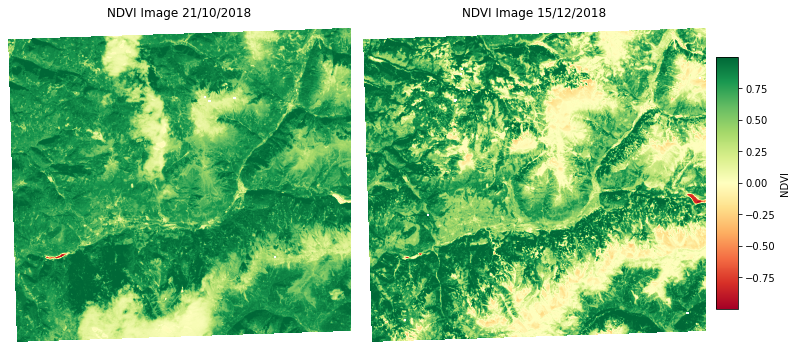

In [5]:

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot the first NDVI image in the left subplot
im1 = axes[0].imshow(ndvi_1, cmap='RdYlGn')
axes[0].set_title('NDVI Image 21/10/2018')

# Plot the second NDVI image in the right subplot
im2 = axes[1].imshow(ndvi_2, cmap='RdYlGn')
axes[1].set_title('NDVI Image 15/12/2018')

# Create an additional axis for the colorbar
cax = fig.add_axes([1, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im2, cax=cax)
cbar.set_label('NDVI')

# Remove axis ticks and labels
for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()



### Classify NDVI images based on a given threshold

In [6]:
classified_image_1,output_file = classify_ndvi(ndvi_1_path, [0.2, 0.6])
classified_image_2,output_file = classify_ndvi(ndvi_2_path, [0.2, 0.6])


### Plot NDVI classified images for both days

<ipython-input-7-3bd1f67d0d44>:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


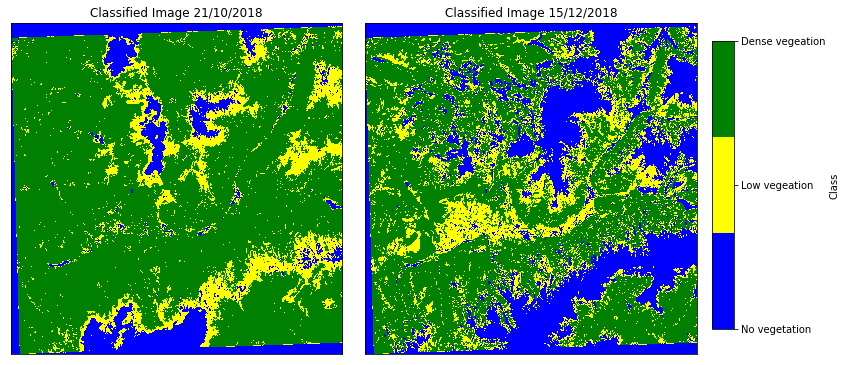

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
class_labels = ['No vegetation', 'Low vegeation', 'Dense vegeation']

# Create a colormap with the number of classes
colors = ['blue', 'yellow', 'green']
cmap = ListedColormap(colors[:len(class_labels)])


# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first classified image in the left subplot
axes[0].imshow(classified_image_1, cmap=cmap)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('Classified Image 21/10/2018')

# Plot the second classified image in the right subplot
axes[1].imshow(classified_image_2, cmap=cmap)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title('Classified Image 15/12/2018')

# Add a colorbar to the right of the subplots
cax = fig.add_axes([1, 0.1, 0.03, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(axes[1].imshow(classified_image_2, cmap=cmap), cax=cax)
cbar.set_ticks(range(len(class_labels)))
cbar.set_ticklabels(class_labels)  # Set the custom labels
cbar.set_label('Class')

plt.tight_layout()
plt.show()


### Measure the difference in the area of the vegetation classes

In [8]:
dense_vegetation_area_day_1 = measure_class_area(classified_image_1,2,10)
low_vegetation_area_day_1 = measure_class_area(classified_image_1,1,10)
dense_vegetation_area_day_2 = measure_class_area(classified_image_2,2,10)
low_vegetation_area_day_2 = measure_class_area(classified_image_2,1,10)

difference_dense = dense_vegetation_area_day_1 - dense_vegetation_area_day_2
print("Between the two dates there were", round(difference_dense, 2),"hectares lost of dense vegatation")


Between the two dates there were 264239.81 hectares lost of dense vegatation
